# Лабораторне заняття №7

# Перетворення випадкових величин
На цьому занятті ми реалізуємо перетворення випадкових величин із розглянутих раніше розподілів, які реалізовані в бібліотеці [SciPy](https://docs.scipy.org/doc/scipy/reference/).
Із цього пакету будемо використовувати клас [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html), в якому реалізована велика кількість імовірнісних розподілів і статистичних функцій.

Для візуалізації використаємо бібліотеку [Matplotlib](https://matplotlib.org/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

Справедливі два твердження про квантильне перетворення:
1. Нехай випадкова величина $\xi$ має неперервну функцію розподілу $F$.
Тоді випадкова величина $\eta = F(\xi)$ має стандартний рівномірний розподіл:
$F(\xi) \sim Unif(0, 1)$.
2. Нехай $F$ - неперервна функція розподілу,
випадкова величина $\eta$ має стандартний рівномірний розподіл: $\eta \sim Unif(0, 1)$.
Тоді випадкова величина $\xi = F^{-1}(\eta)$ має функцію розподілу $F$.

### 1.1 Експоненційний розподіл

Реалізуйте перше твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з функцією розподілу $F$:
- згенеруйте $n = 10000$ значень випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F(\xi)$;
- намалюйте щільність стандартного рівномірного розподілу на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

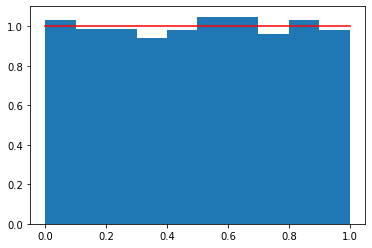

In [2]:
# Місце для Вашого коду

from scipy.stats import expon, uniform

xi = expon()
eta = uniform()

xi_rvs = xi.rvs(size=10000)
f_xi_rvs = xi.cdf(xi_rvs)

plt.hist(f_xi_rvs, density=True, bins=10)

x = np.arange(0, 1.01, 0.01)
y = eta.pdf(x)

plt.plot(x, y, 'r')
plt.show()

Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з функцією розподілу $F$:
- згенеруйте $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- обчисліть функцію обернену до функції розподілу випадкової величини $\xi$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте форму нормованої гістограми та функції щільності.

Що відбувається при збільшенні (зменшенні) кількості випадкових значень $n$?

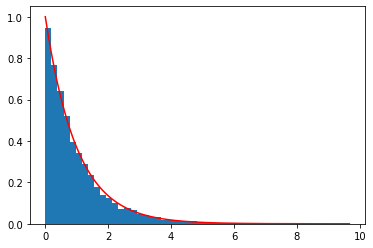

In [3]:
# Місце для Вашого коду

eta_rvs = eta.rvs(size=10000)
f_eta_rvs = -np.log(1 - eta_rvs)

plt.hist(f_eta_rvs, density=True, bins=50)

x = np.arange(0, max(f_eta_rvs), 0.01)
y = xi.pdf(x)

plt.plot(x, y, 'r')
plt.show()

### 1.2 Квантиль

Нехай $F$ - функція розпділу деякої випадкової величини $\xi$, $\alpha \in [0, 1]$.

Квантиль рівня $\alpha$ - це таке число $x_{\alpha}$, що
$$F \left(x_{\alpha}\right) = \mathsf{P}\left(\xi < x_{\alpha}\right) = \alpha.$$

Інший варіант визначення. Нехай $Q(\alpha)$ - це квантиль рівня $\alpha$. Тоді
$$Q(\alpha) = \inf \left\{ x \in \mathbb{R} \, \colon \, \alpha < F(x) \right\}.$$

Якщо $F$ - неперервна та строго зростає, то
$$Q = F^{-1}.$$

Для розподілів із класу **scipy.stats** функція квантилю реалізована методом **ppf**.

Наприклад, для експоненційного розподілу маємо (детальна інформація в [документації](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)):

In [4]:
from scipy.stats import expon

q = np.arange(0, 1.1, 0.1)
f_q = expon.ppf(q, loc=0, scale=1)
print(f_q)

qq = expon.cdf(f_q, loc=0, scale=1)
print(qq)

[0.         0.10536052 0.22314355 0.35667494 0.51082562 0.69314718
 0.91629073 1.2039728  1.60943791 2.30258509        inf]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Для випадкової величини $\xi \sim Exp(1)$ застосуйте метод **ppf** до згенерованих раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$.
Порівняйте ці значення з отриманими раніше $n = 10000$ значеннями випадкової величини $F^{-1}(\eta)$ за допомогою оберненої функції розподілу, яку Ви обчислювали.

**Зауваження.** В прикладі нижче:
- `xi` - це випадкова величина зі стандартного експоненційного розподілу ($\lambda = 1$);
- `eta_rvs` - $10000$ випадкових значень зі стандартного рівномірного розподілу;
- `f_eta_rvs` - значення оберненої до функції розподілу стандартного експоненційного розподілу в точках `eta_rvs`.

In [5]:
print("Number of different values = {}".format(sum(f_eta_rvs != xi.ppf(eta_rvs))))
print("Number of values that differ more than 10^{} = {}".format("{-10}", sum(f_eta_rvs - xi.ppf(eta_rvs) > 10**(-10))))

Number of different values = 150
Number of values that differ more than 10^{-10} = 0


In [6]:
# Місце для Вашого коду



Реалізуйте друге твердження про квантильне перетворення для випадкової величини $\xi \sim Exp(1)$ з використанням вбудованого методу квантильної функції:
- візьміть згенеровані раніше $n = 10000$ значень випадкової величини $\eta \sim Unif(0, 1)$;
- отримайте $n = 10000$ значень випадкової величини $F^{-1}(\eta)$ за допомогою методу **ppf**;
- намалюйте нормовану гістограму отриманих $n = 10000$ значень випадкової величини $F^{-1}(\eta)$;
- намалюйте щільність випадкової величини $\xi$ на тому ж графіку.

Порівняйте даний графік з отриманим раніше.

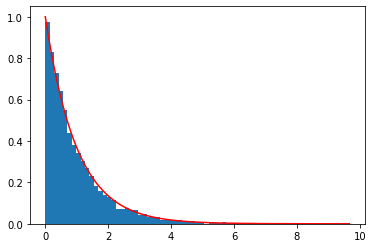

In [7]:
# Місце для Вашого коду

f_eta_rvs = xi.ppf(eta_rvs)

plt.hist(f_eta_rvs, density=True, bins=69)

x = np.arange(0, max(f_eta_rvs), 0.01)
y = xi.pdf(x)

plt.plot(x, y, 'r')
plt.show()

## 2 Модуль від випадкової величини

### 2.1 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

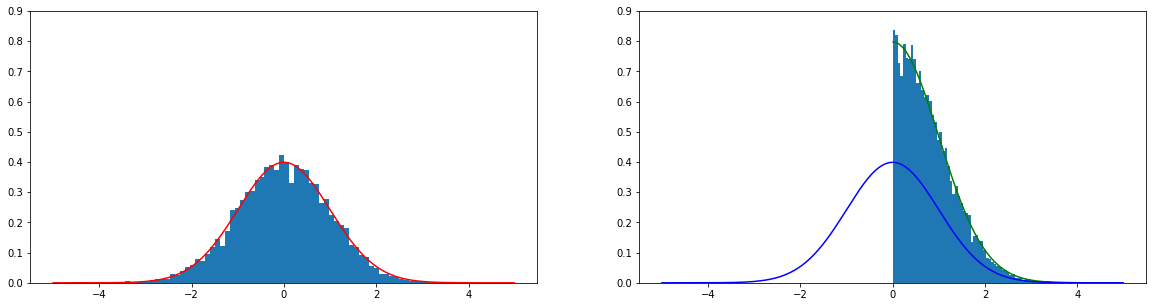

In [8]:
# Місце для Вашого коду

from scipy.stats import norm

xi = norm()

x = np.arange(-5, 5, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = np.abs(rvs_1)

fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins=69)
axs[0].set_ylim(0, 0.9)

x1 = x[x>=0]
y1 = 2 * xi.pdf(x1)

axs[1].plot(x1, y1, 'g')
axs[1].plot(x, y, 'b')
axs[1].hist(rvs_2, density=True, bins=69)
axs[1].set_ylim(0, 0.9)

plt.show()

### 2.2 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ з рівномірного розподілу на $[-1, 4]$.
Тобто $\xi \sim Unif(-1, 4)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi|$.

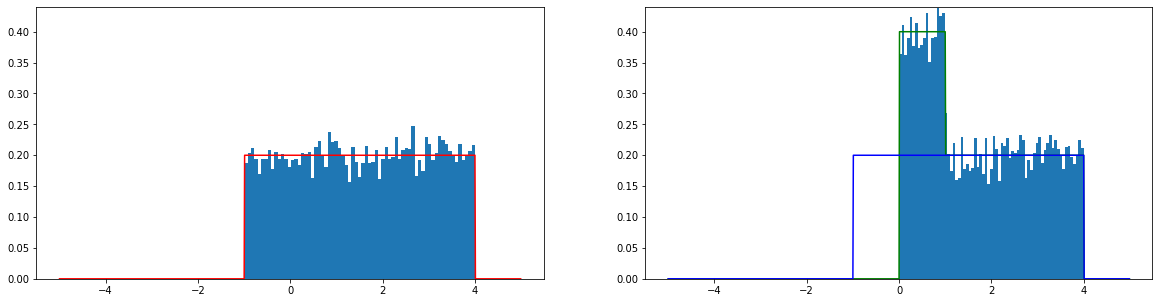

In [9]:
# Місце для Вашого коду

from scipy.stats import uniform

xi = uniform(-1, 5)

x = np.arange(-5, 5, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = np.abs(rvs_1)

fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins=69)
axs[0].set_ylim(0, 0.44)

def f(x):
    return [0 if y<0 else 0.4 if y<1 else 0.2 if y<4 else 0 for y in x]

axs[1].plot(x, f(x), 'g')
axs[1].plot(x, y, 'b')
axs[1].hist(rvs_2, density=True, bins=69)
axs[1].set_ylim(0, 0.44)

plt.show()

### 2.3 Експоненційний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $|\xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $|\xi - 1|$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $|\xi - 1|$.

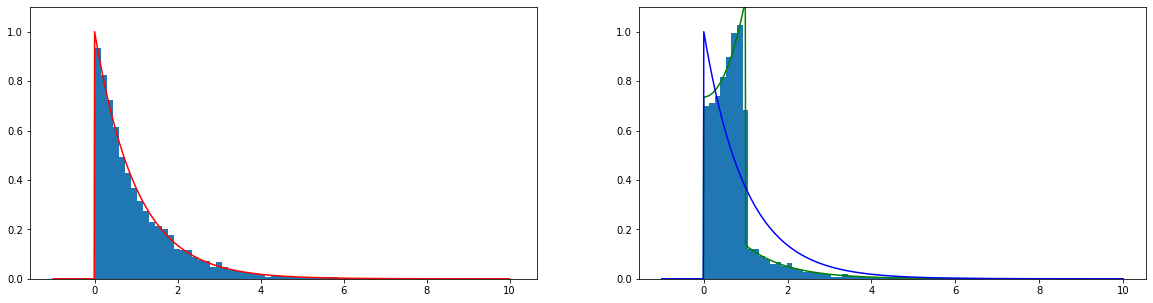

In [10]:
# Місце для Вашого коду

from scipy.stats import expon

xi = expon()

x = np.arange(-1, 10.01, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = np.abs(rvs_1 - 1)

fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins=69)
axs[0].set_ylim(0, 1.1)

def f(x):
    return [0 if y<0 else expon.pdf(-y, loc=-1)+expon.pdf(y, loc=-1) if y<1 else expon.pdf(y, loc=-1) for y in x]

axs[1].plot(x, f(x), 'g')
axs[1].plot(x, y, 'b')
axs[1].hist(rvs_2, density=True, bins=69)
axs[1].set_ylim(0, 1.1)

plt.show()

## 3 Квадрат від випадкової величини

### 3.1 Рівномірний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$.

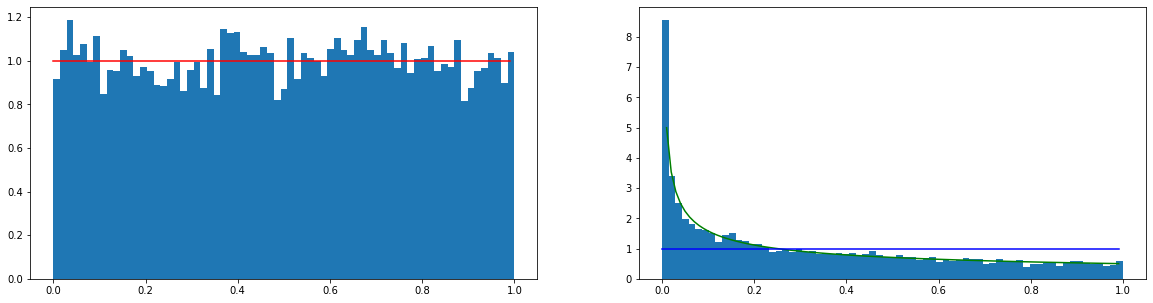

In [11]:
# Місце для Вашого коду

from scipy.stats import uniform

xi = uniform()

x = np.arange(0, 1, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = rvs_1**2

fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins=69)

axs[1].plot(x[1:], 0.5/np.sqrt(x[1:]), 'g')
axs[1].plot(x, y, 'b')
axs[1].hist(rvs_2, density=True, bins=69)

plt.show()

### 3.2 Нормальний розподіл

Розглянемо випадкову величину $\xi$ зі стандартного нормального розподілу.
Тобто $\xi \sim N(0, 1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\xi^2$ (застосуйте функцію піднесення до квадрата до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi^2$;
   - функцію щільності випадкової величини $\eta \sim \chi^2_1$;
   - функцію щільності випадкової величини $\eta \sim \Gamma(1/2, 1/2)$.

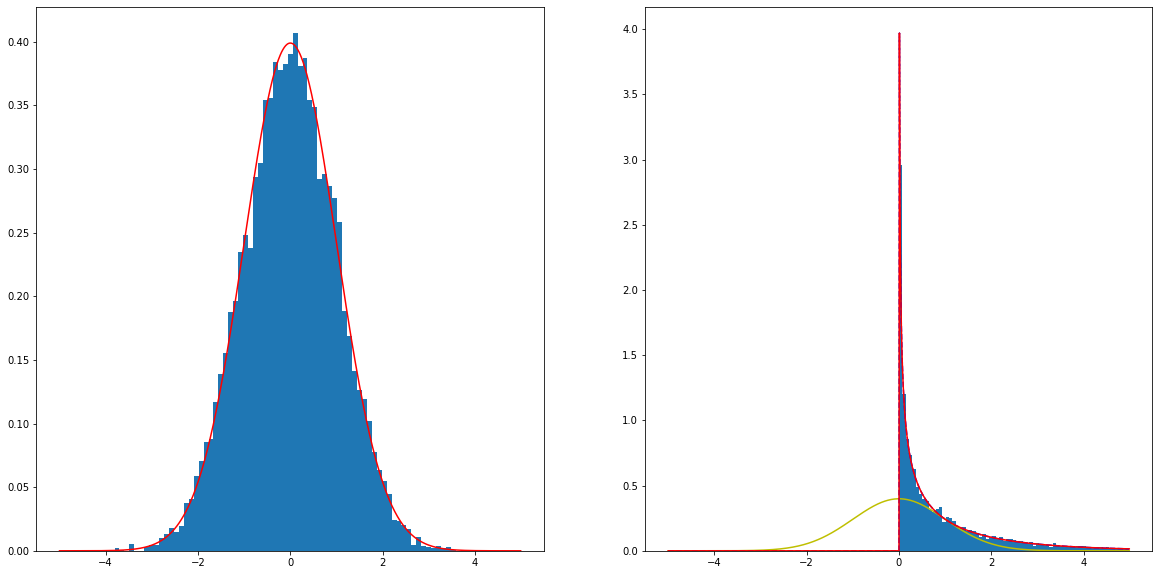

In [12]:
# Місце для Вашого коду

from scipy.stats import norm, gamma, chi2

xi = norm()

x = np.arange(-5, 5, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = rvs_1**2
rvs_2 = rvs_2[rvs_2<5]
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins=69)

axs[1].plot(x, y, 'y')
y = gamma.pdf(x, a=1/2, scale=2)
axs[1].plot(x, y, 'b--')
y = chi2.pdf(x, df=1)
axs[1].plot(x, y, 'r')
axs[1].hist(rvs_2, density=True, bins=69)

plt.show()

## 4 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) \geq 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$.

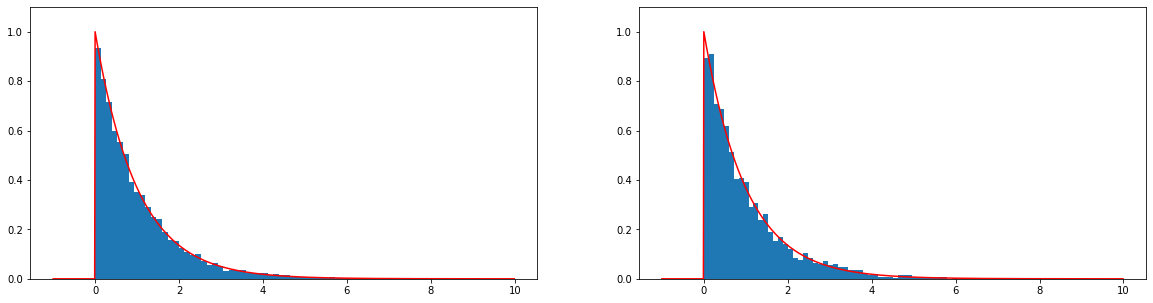

In [13]:
# Місце для Вашого коду

from scipy.stats import expon

xi = expon()

x = np.arange(-1, 10, 0.01)
y = xi.pdf(x)

rvs_1 = xi.rvs(size=10000)
rvs_2 = rvs_1 - 1
rvs_2 = rvs_2[rvs_2 >= 0]

fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].plot(x, y, 'r')
axs[0].hist(rvs_1, density=True, bins=69)
axs[0].set_ylim(0, 1.1)

axs[1].plot(x, y, 'r')
axs[1].hist(rvs_2, density=True, bins=69)
axs[1].set_ylim(0, 1.1)

plt.show()

## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [14]:
# Місце для Вашого коду

from scipy.stats import uniform

xi = uniform()
eta = uniform()

x = xi.rvs(size=100000)
y = eta.rvs(size=100000)

Знайдіть функцію щільності випадкової величини $\xi_1 = x + y$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

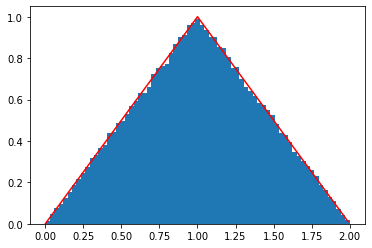

In [15]:
# Місце для Вашого коду

plt.hist(x+y, density=True, bins=69)

def f(y):
    return [x if x<1 else 2-x for x in y]

x1 = np.arange(0, 2, 0.01)
y1 = f(x1)

plt.plot(x1, y1, 'r')

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_2 = xy$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

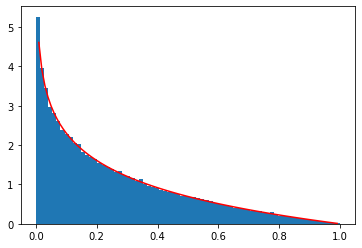

In [16]:
# Місце для Вашого коду

plt.hist(x*y, density=True, bins=69)

x1 = np.arange(0.01, 1, 0.01)
y1 = -np.log(x1)

plt.plot(x1, y1, 'r')

plt.show()

Знайдіть функцію щільності випадкової величини $\xi_3 = \min (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

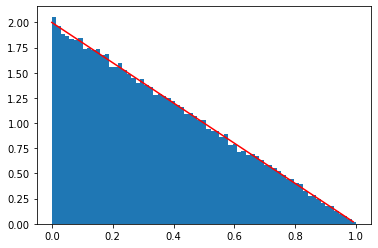

In [17]:
# Місце для Вашого коду

plt.hist(np.minimum(x,y), density=True, bins=69)

x1 = np.arange(0, 1, 0.01)
y1 = 2 - 2 * x1

plt.plot(x1, y1, 'r')

plt.show()